# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [3]:
import pickle
import boto3
import pandas as pd
import boto3.session

mybucket = 'trafficsigndetectionbiju'

##The pickle files are uploaded into S3. Below code will get the pickle file for train, test and valid using boto3
session = boto3.session.Session(region_name='us-east-2')
s3client = session.client('s3', config= boto3.session.Config(signature_version='s3v4'))
###pickle file for test
testresp = s3client.get_object(Bucket=mybucket, Key='traffic-signs-data /test.p')
test_string = testresp['Body'].read()

###pickle file for train
trainresp = s3client.get_object(Bucket=mybucket, Key='traffic-signs-data /train.p')
train_string = trainresp['Body'].read()

####pickle file for valid
validresp = s3client.get_object(Bucket=mybucket, Key='traffic-signs-data /valid.p')
valid_string = validresp['Body'].read()


train = pickle.loads(train_string)
valid = pickle.loads(valid_string)
test = pickle.loads(test_string)

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [4]:
'''
#uncomment code only when running from local machine
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file='traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
'''

"\n#uncomment code only when running from local machine\n# Load pickled data\nimport pickle\n\n# TODO: Fill this in based on where you saved the training and testing data\n\ntraining_file = 'traffic-signs-data/train.p'\nvalidation_file='traffic-signs-data/valid.p'\ntesting_file = 'traffic-signs-data/test.p'\n\nwith open(training_file, mode='rb') as f:\n    train = pickle.load(f)\nwith open(validation_file, mode='rb') as f:\n    valid = pickle.load(f)\nwith open(testing_file, mode='rb') as f:\n    test = pickle.load(f)\n\nX_train, y_train = train['features'], train['labels']\nX_valid, y_valid = valid['features'], valid['labels']\nX_test, y_test = test['features'], test['labels']\n"

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import io 

%matplotlib inline

#reset the tensorflow graph
tf.reset_default_graph()

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [6]:
##Get the sign names dataset and load into a dataframe from S3
obj = s3client.get_object(Bucket='trafficsigndetectionbiju', Key='signnames.csv')

class_desc = pd.read_csv(obj['Body'])
class_desc.head()

ClassId              SignName
0        0  Speed limit (20km/h)
1        1  Speed limit (30km/h)
2        2  Speed limit (50km/h)
3        3  Speed limit (60km/h)
4        4  Speed limit (70km/h)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [7]:
##Shape of train, valid and test dataset
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)
print(y_train.shape)


(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)
(34799,)


In [8]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [9]:
##Code below is for visualizing few samples of the training dataset
def visualize_trainset():
    ### Visualisation of training set
    fig = plt.figure(figsize=(16,5))
    fig.suptitle('Examples of images from training set', fontsize=20)

    for i in range(1,16*5+1):
        index = random.randint(0, len(X_train))
        image = X_train[index].squeeze()

        plt.subplot(5,16,i)
        plt.imshow(image)

        
    img_data = io.BytesIO()
    fig.savefig(img_data, format='png')
    img_data.seek(0)
    s3client.put_object(Bucket=mybucket,Body=img_data, ContentType='image/png', Key='output_images/training_set.png')

#uncomment below for generating the training images
#visualize_trainset()

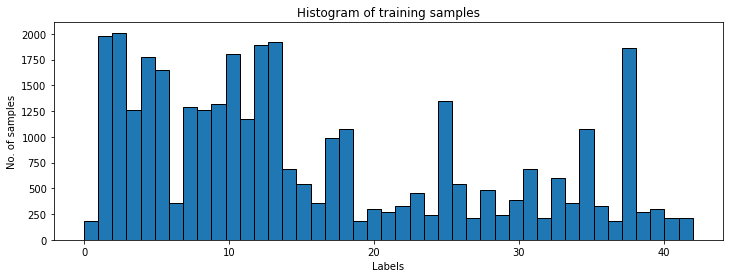

In [10]:
##Code below  is for generating histogram of the training samples to determine the distribution of data in each sample
def histogram_training():
    # Histogram of the training samples. We could see that some of the classes have very few representations.
    fig = plt.figure(figsize=(12,4))
    n, bins, patches = plt.hist(y_train, n_classes, edgecolor='black')
    plt.xlabel('Labels')
    plt.ylabel('No. of samples')
    plt.title('Histogram of training samples')

    img_data = io.BytesIO()
    fig.savefig(img_data, format='png')
    img_data.seek(0)
    s3client.put_object(Bucket=mybucket,Body=img_data, ContentType='image/png', Key='output_images/train_histogram.png')
#uncomment if you want to run this function
histogram_training()

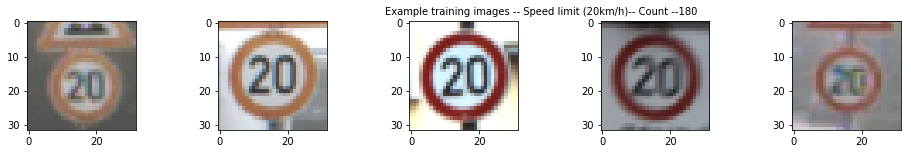

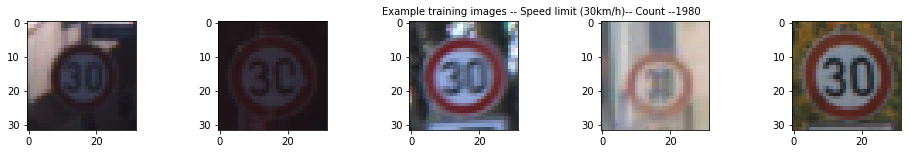

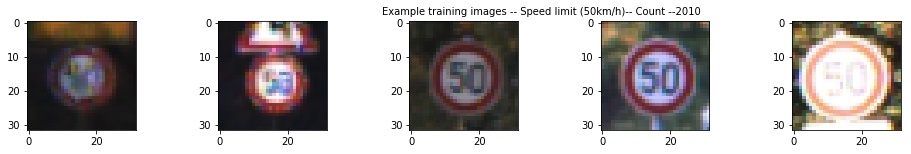

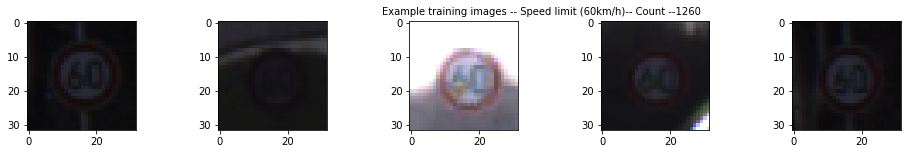

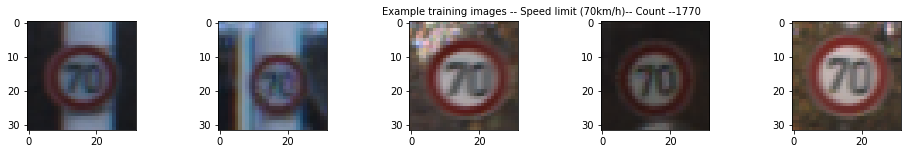

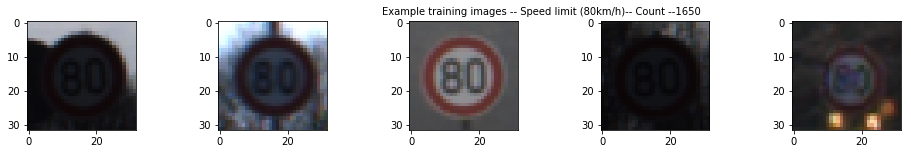

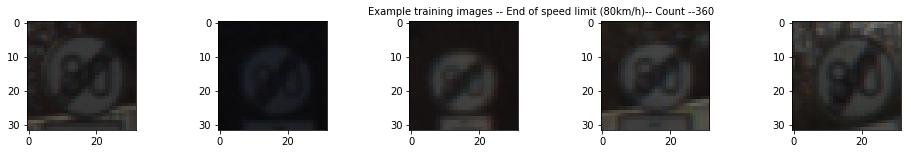

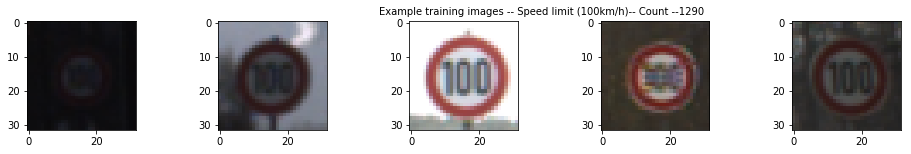

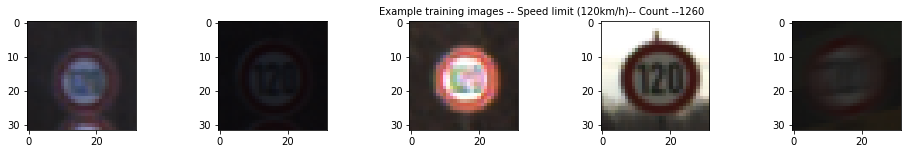

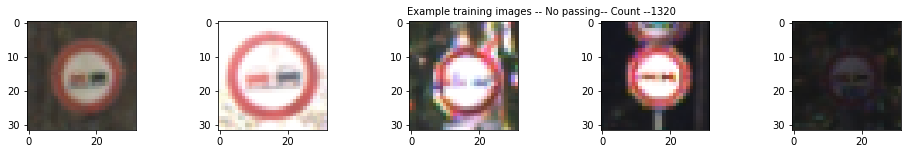

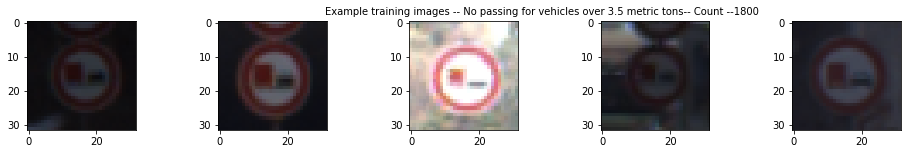

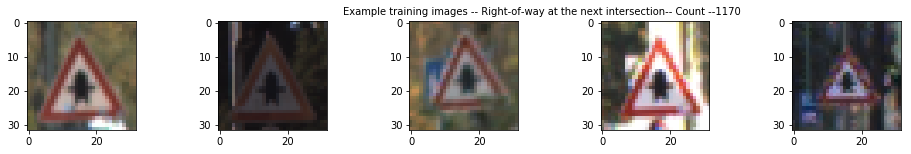

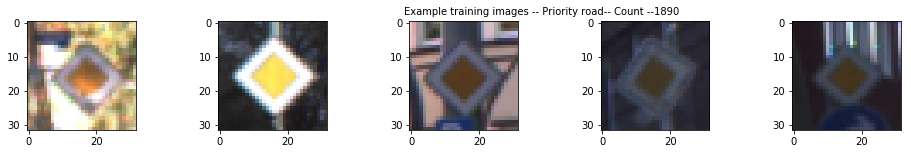

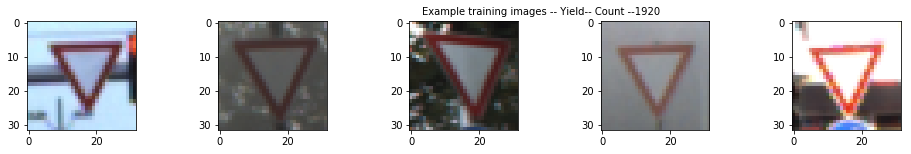

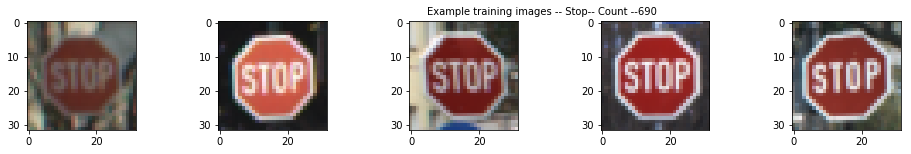

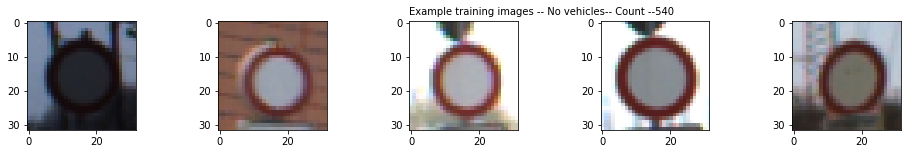

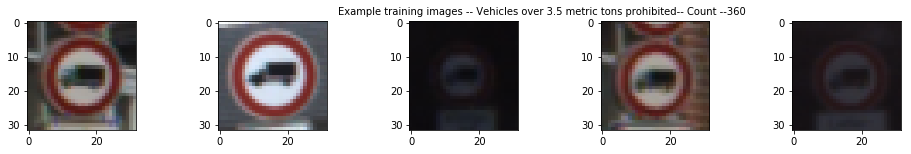

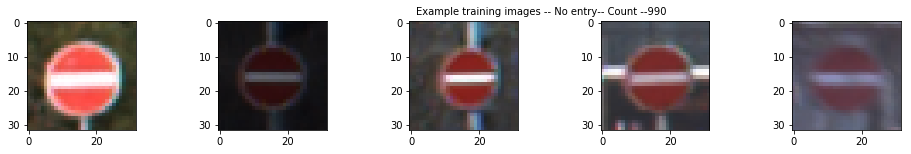

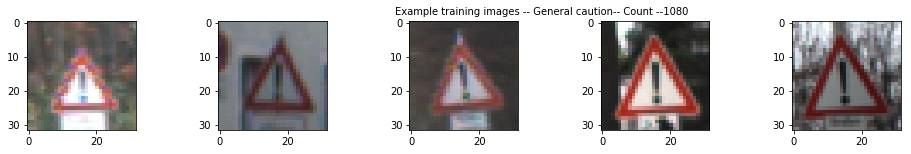

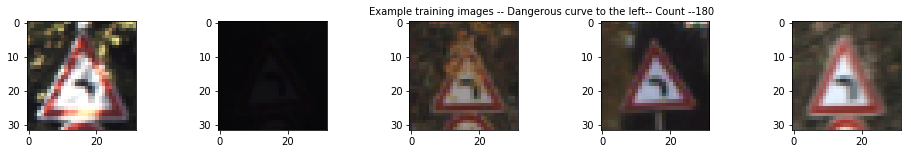

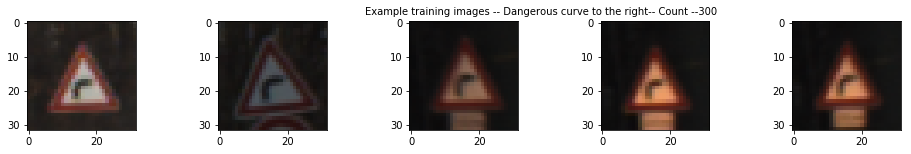

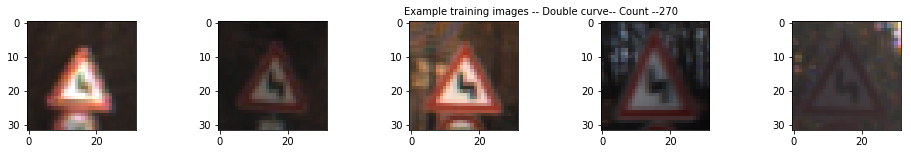

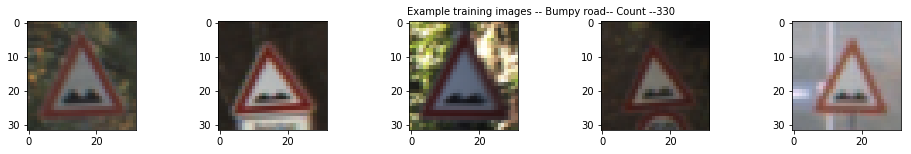

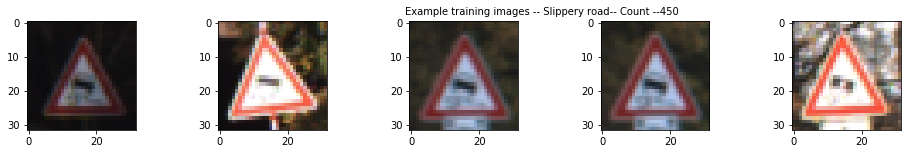

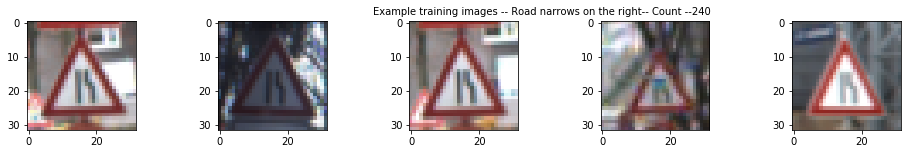

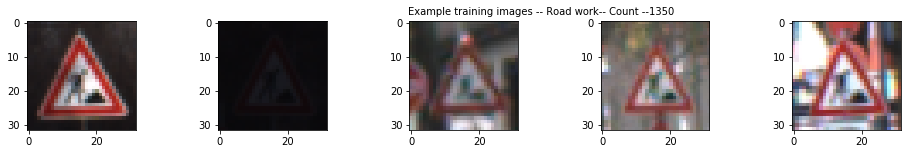

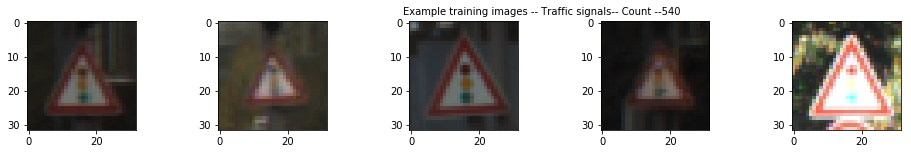

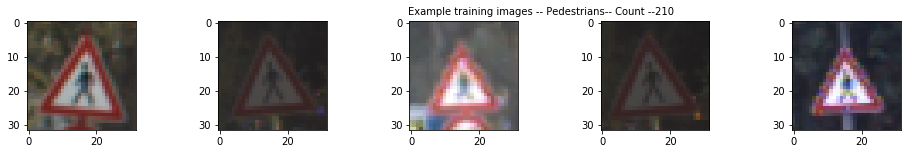

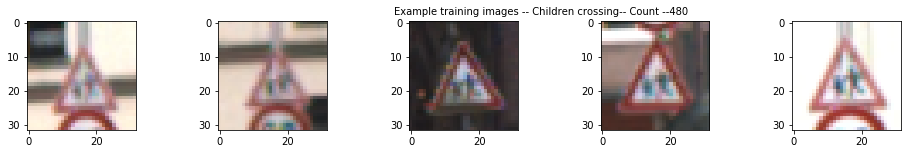

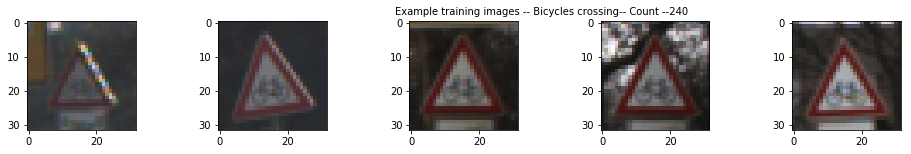

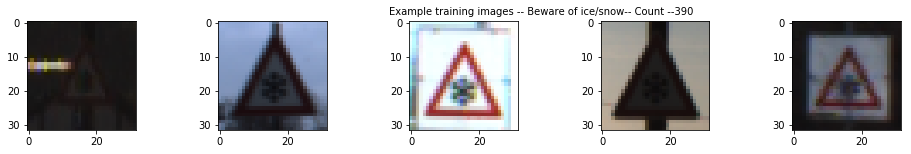

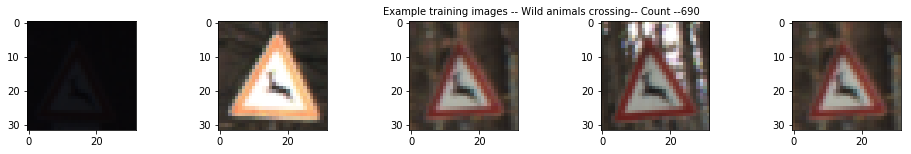

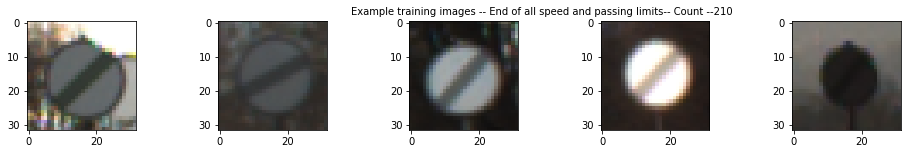

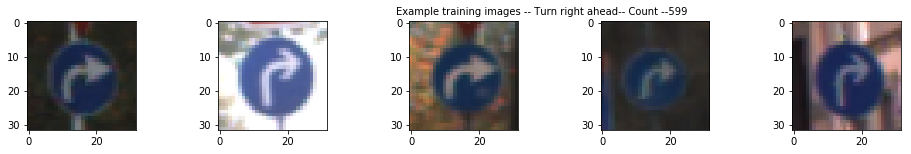

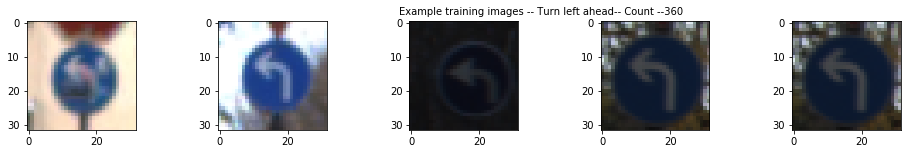

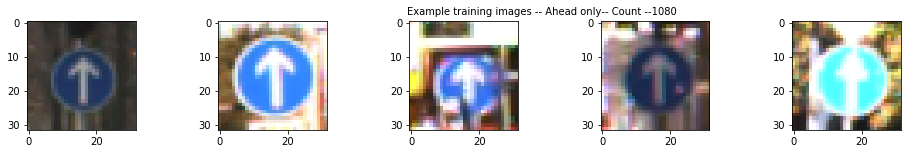

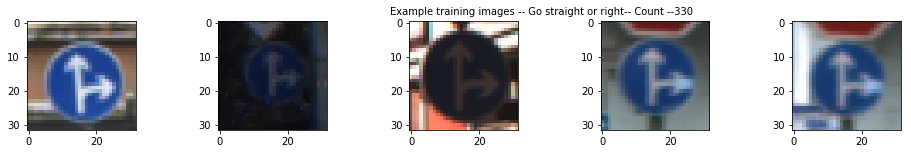

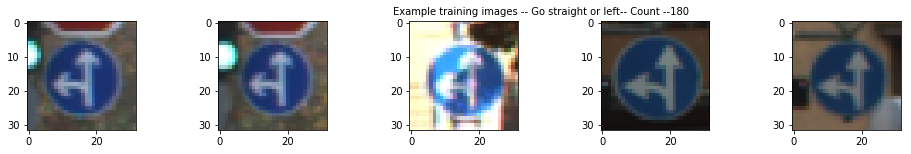

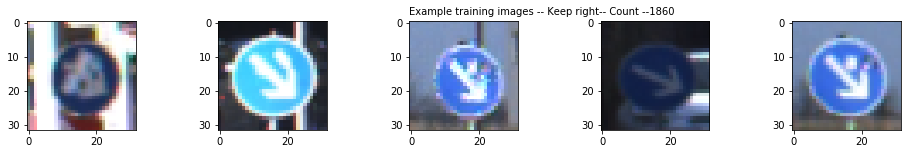

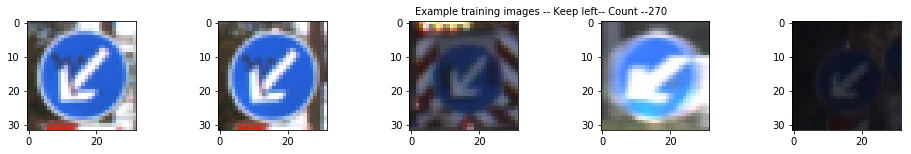

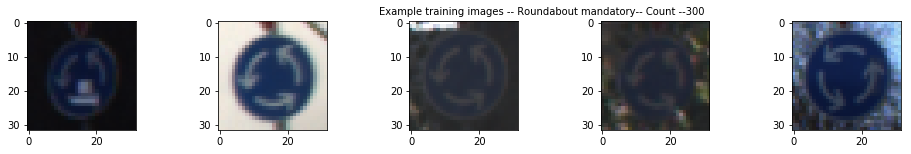

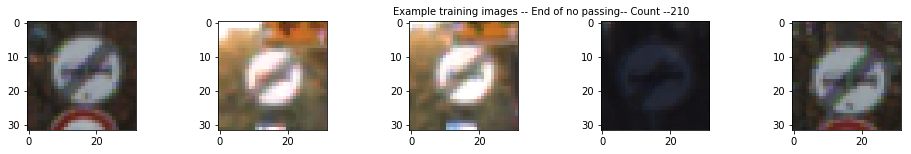

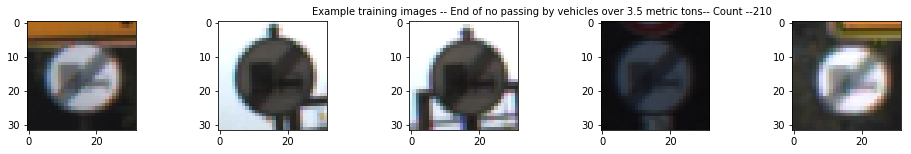

In [11]:
###Visualize some of the samples of the training data set

import re
def visualize_each_label():
    somevalues = 43  #[8, 14, 19, 28]
    plt.rcParams.update({'figure.max_open_warning': 0})
    for val in range(somevalues):
        X_train_one_label = X_train[np.where(y_train==val)]
        desc = class_desc.loc[class_desc.ClassId==val]
        name = desc.SignName.values.item()
        length = len(X_train_one_label)

        writename=re.sub(r'[(|)|/|" "]',r'',name+'.png')
        ### Visualisation of training set
        fig = plt.figure(figsize=(20,2))
        fig.tight_layout()
        fig.suptitle('Example training images -- '+name +
                     '-- Count --' + np.str(length) , fontsize=10)
        
        for i in range(1,6):
            index = random.randint(0, length-1)
            image = X_train_one_label[index].squeeze()

            plt.subplot(1,6,i)
            plt.imshow(image)
        
        img_data = io.BytesIO()
        fig.savefig(img_data, format='png')
        img_data.seek(0)
        #s3client.put_object(Bucket=mybucket,Body=img_data, ContentType='image/png', Key='output_images/'+writename)
#uncomment if you want to visualize few of the training images for each label
visualize_each_label()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [12]:
import cv2

# image processing library
import skimage as sk
from skimage import transform
from skimage import util
#from skimage import io
from skimage import exposure
from scipy import ndimage
import io

In [13]:
##The images are rotated to create new transformed images
def random_rotation(image):
    # pick a random degree of rotation between 25% on the left and 25% on the right
    random_degree = random.uniform(-30, 30)
    rotate_img = sk.transform.rotate(image, random_degree)
    return rotate_img
###Noise is introduced to a sample random image to create a new transformed image
def random_noise(image):
    # add random noise to the image
    random_noise_img= sk.util.random_noise(image, mode='gaussian')
    return random_noise_img
###creating a new image by stretching or shrinking a random sample image intensity
def rescale_intensity(image):
    v_min, v_max = np.percentile(image, (0.2, 99.8))
    better_contrast = exposure.rescale_intensity(image, in_range=(v_min, v_max))
    return better_contrast
###Blurring a sample random image to create a new transformed image
def blur_image(image):
    blured_image = ndimage.uniform_filter(image, size=(3, 3, 1))
    return blured_image
####scaling out a sample random image to create a new transformed image
def scale_img(image):
    original_size = image.shape
    scale_out = sk.transform.rescale(image, scale=0.5, mode='constant')
    scaled_img = sk.transform.resize(scale_out, original_size, mode='constant')
    return scaled_img
###translating a random sample image on the horizontal/vertical axis to create a transformed image
def translation(image):
    ang_range = 50
    ang_rot = np.random.uniform(ang_range) - ang_range/2
    rows, cols, ch=image.shape
    M = cv2.getRotationMatrix2D((cols/4,rows/4),ang_rot,1)
    dst = cv2.warpAffine(image,M,(cols,rows))
    return dst
    
# dictionary of the transformations we defined above
available_transformations = {
    'rotate': random_rotation,
    'noise': random_noise,
    'rescale_intensity':rescale_intensity,
    'blur_image': blur_image,
    'scale_image': scale_img,
    'translation': translation
}

###Sample testing of the above functions
#image = X_train[0]
#print(image.shape)
#fig, axes = plt.subplots(1, 2, figsize=(4,2))
#ax1,ax2 = axes.flatten()
#ax1.imshow(image)
#ax1.set_title('Original Image', fontsize=20)
#trans = translation(image)
#print(trans.shape)
#ax2.imshow(trans)
#ax2.set_title('Translation', fontsize=20)        


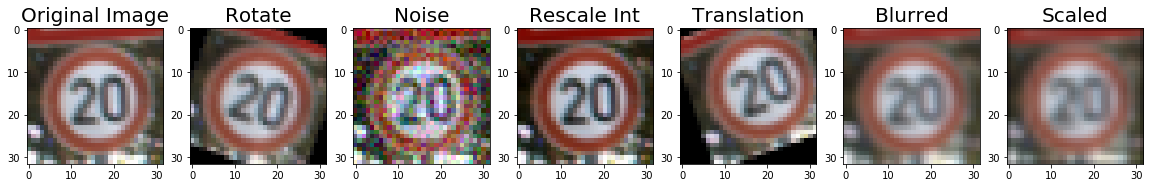

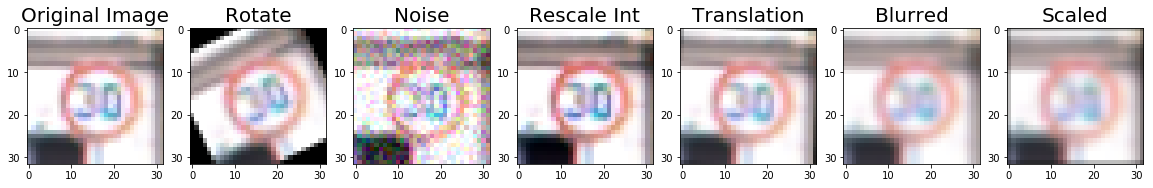

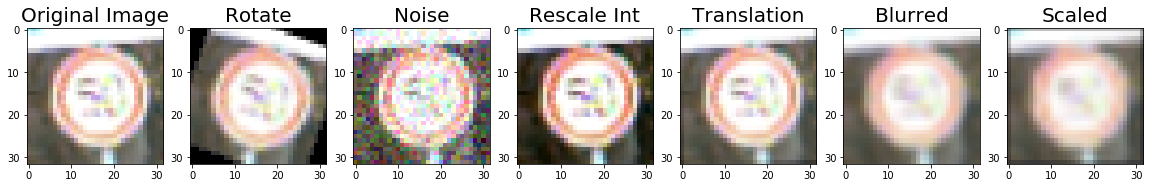

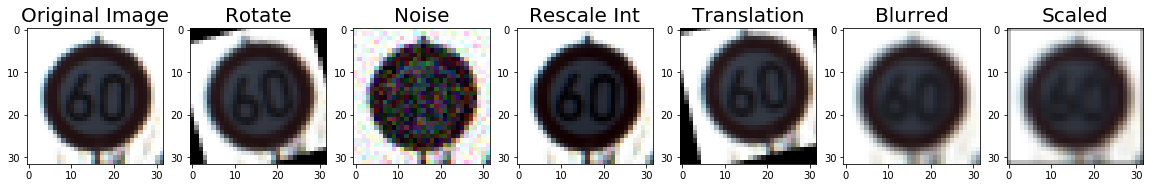

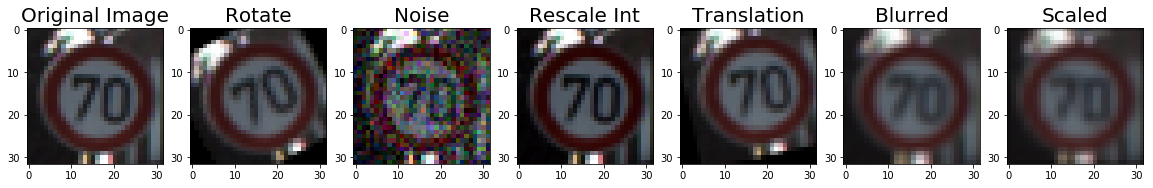

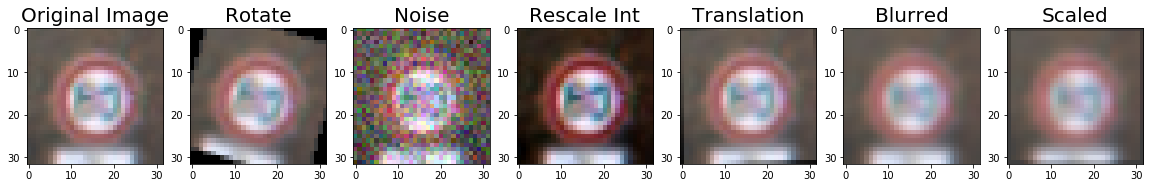

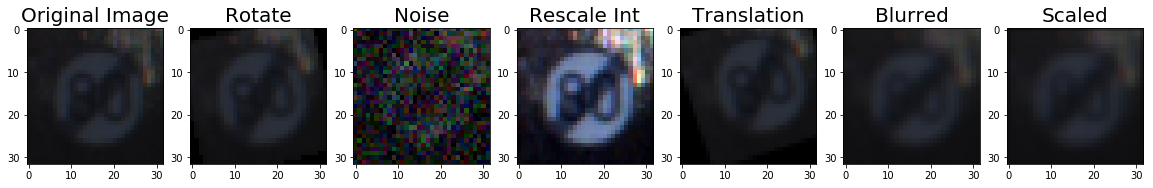

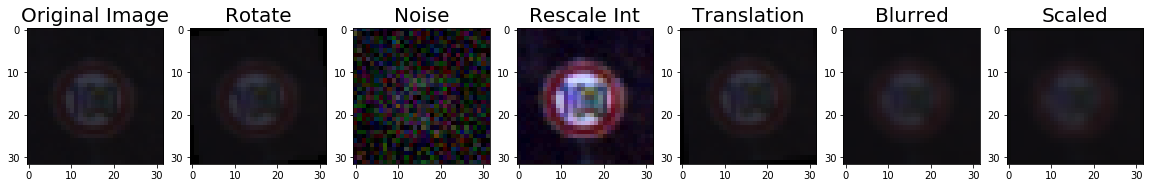

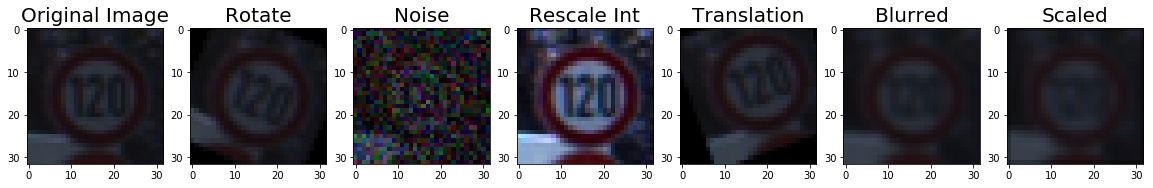

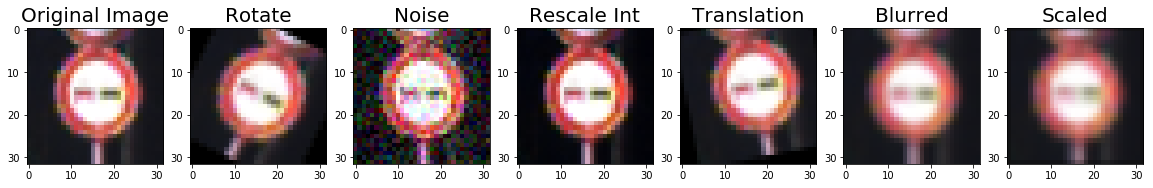

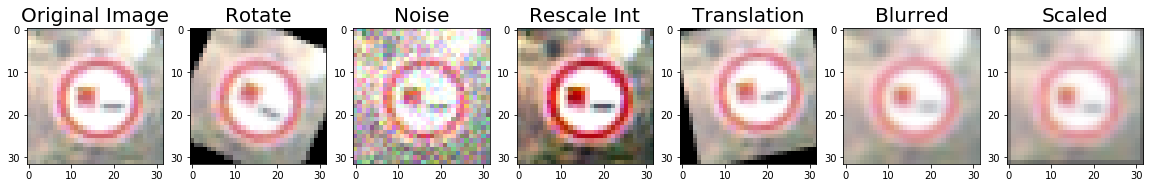

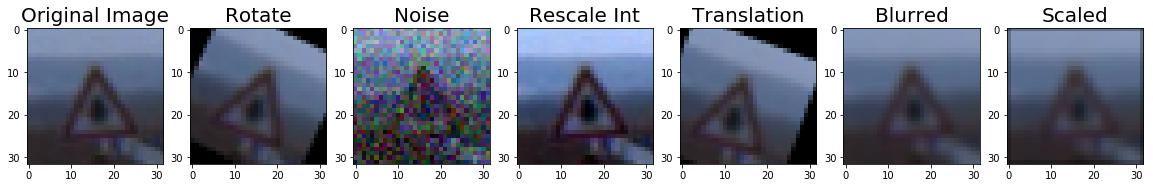

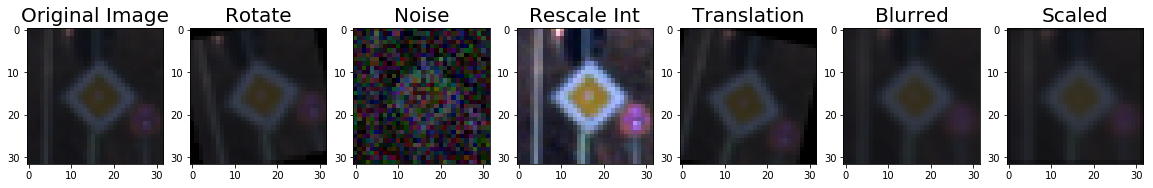

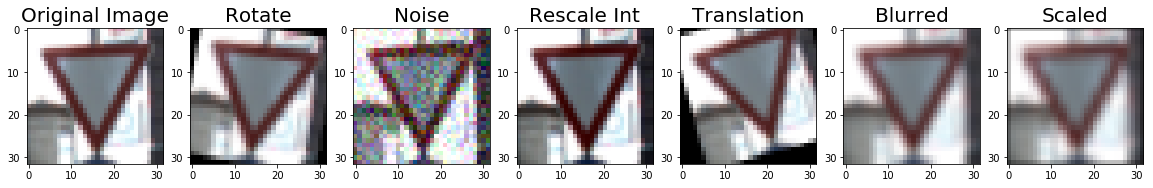

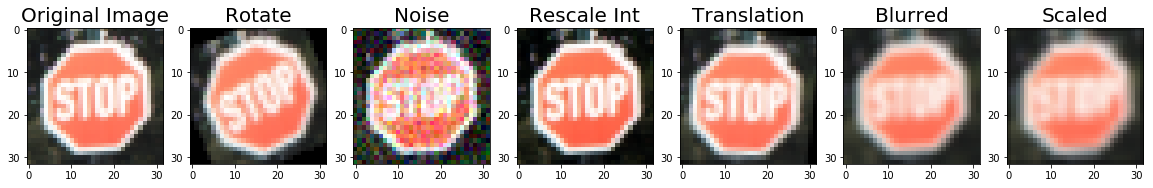

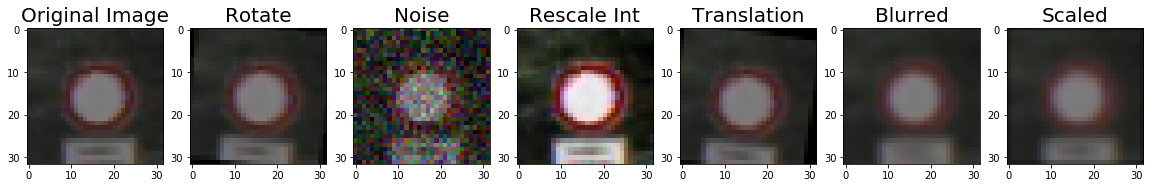

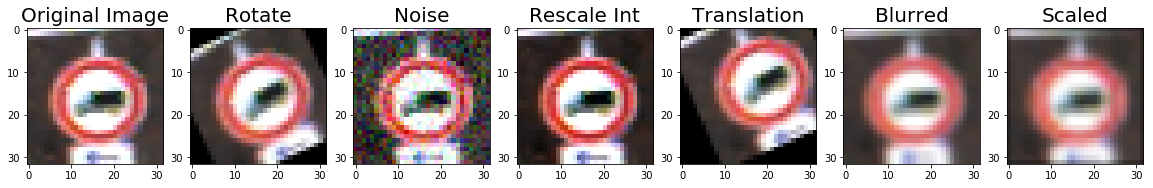

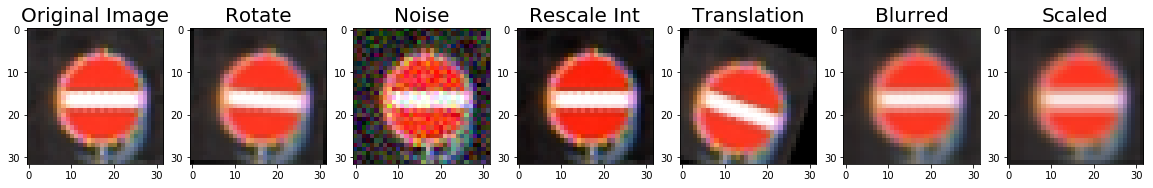

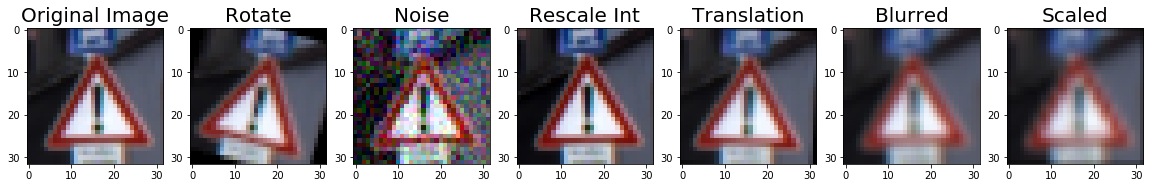

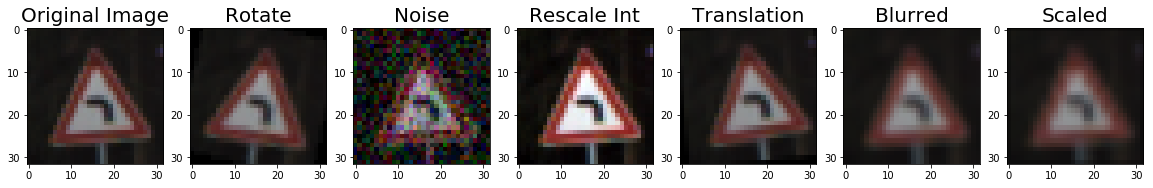

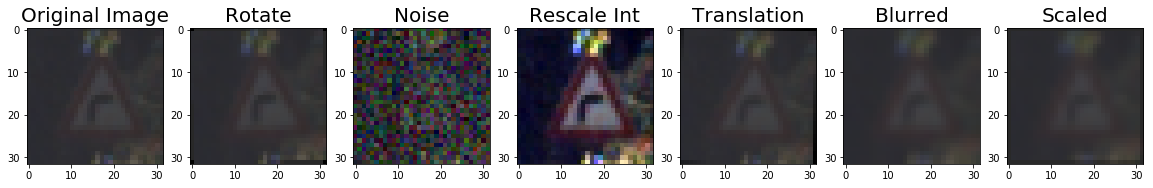

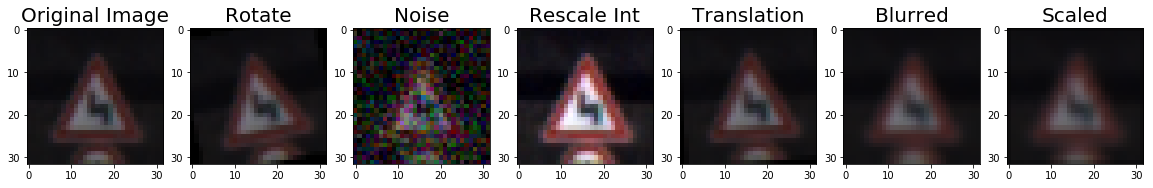

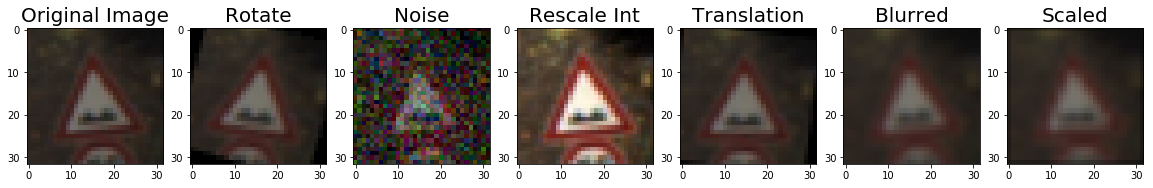

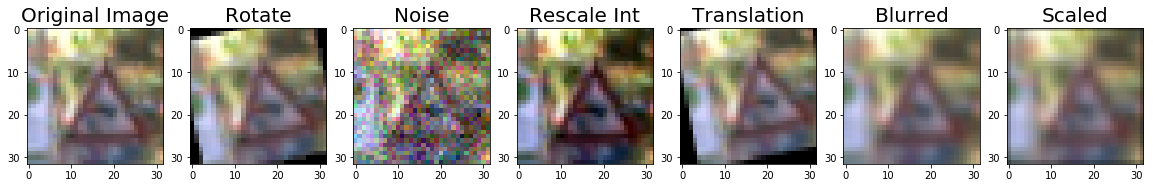

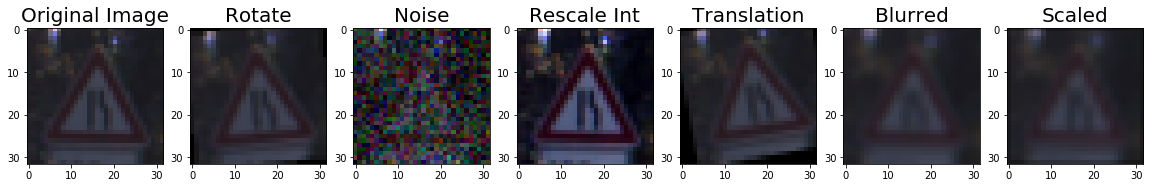

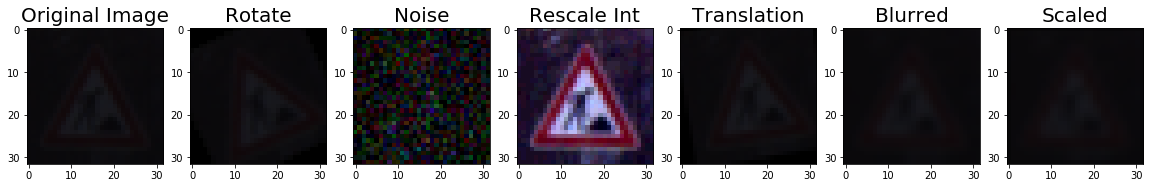

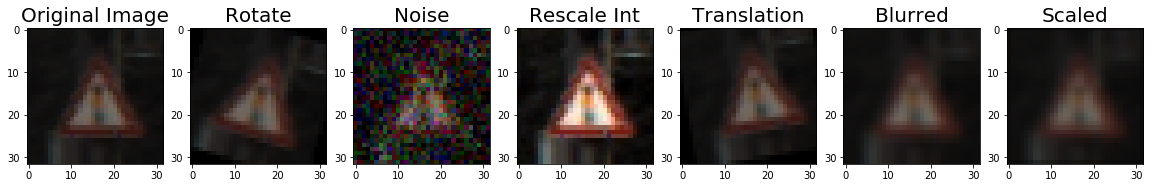

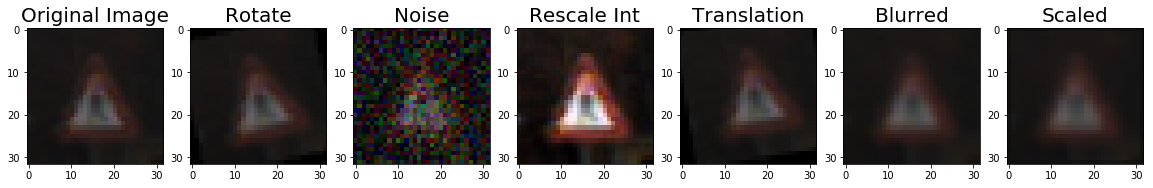

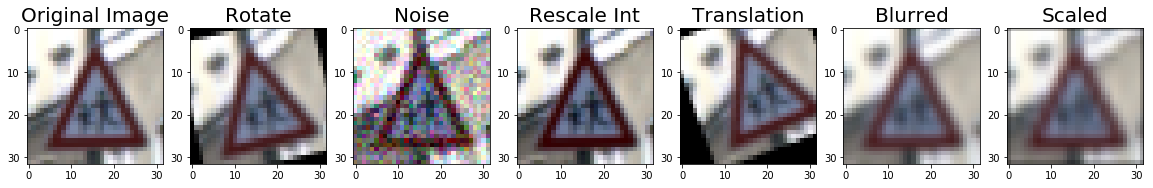

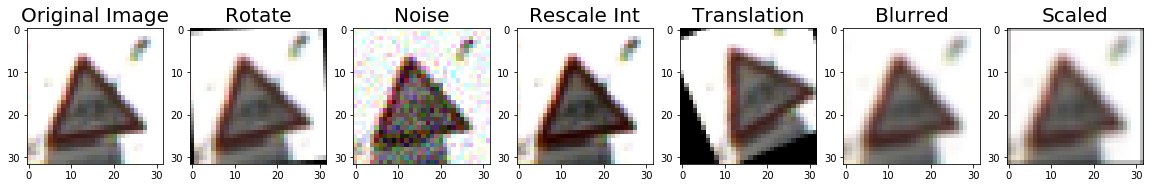

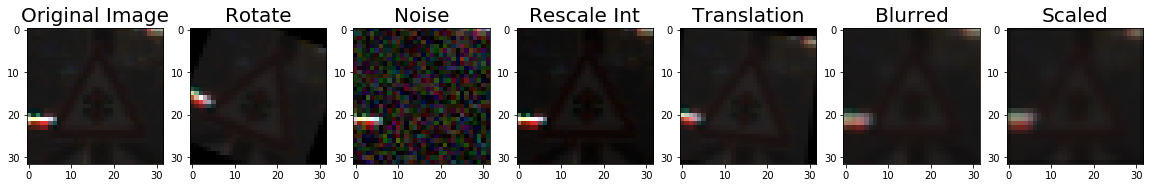

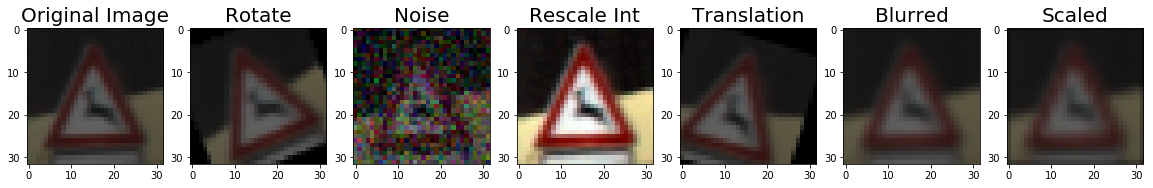

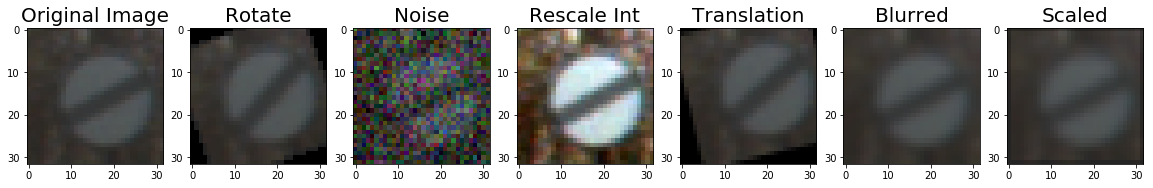

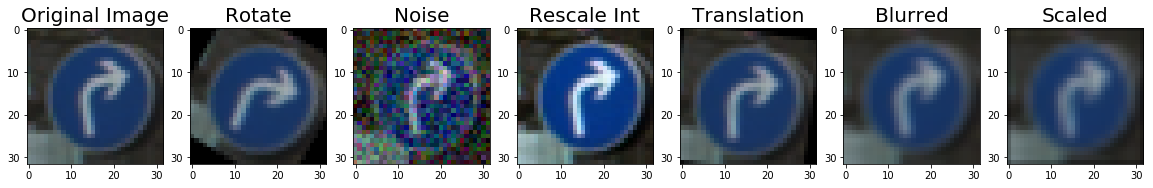

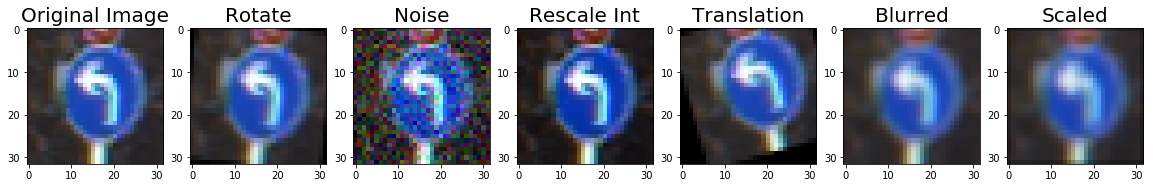

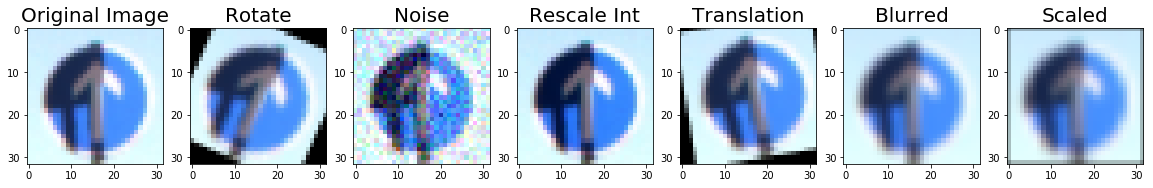

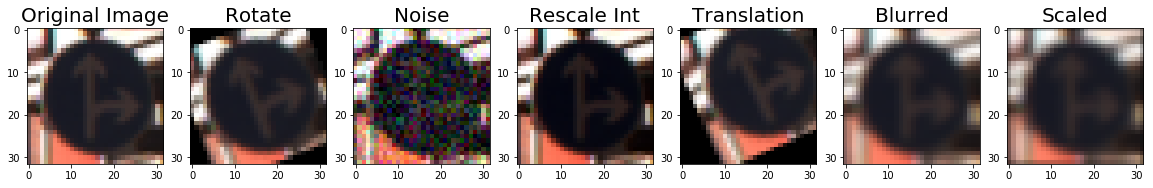

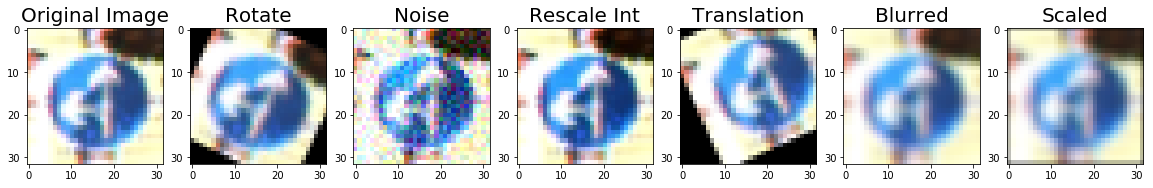

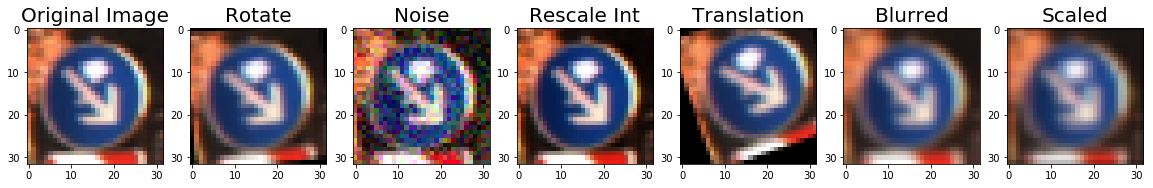

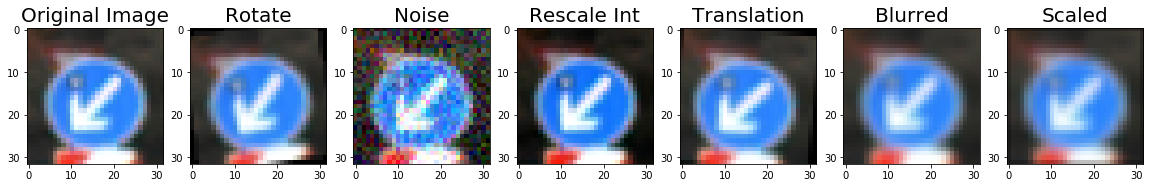

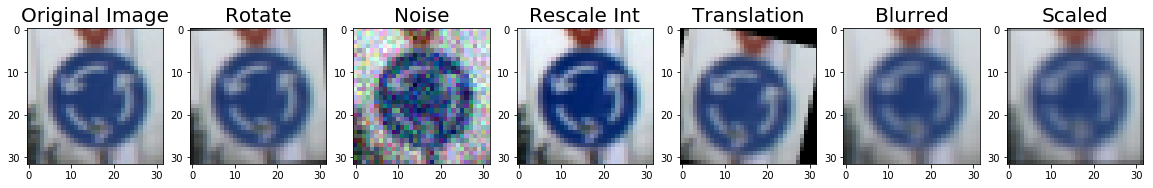

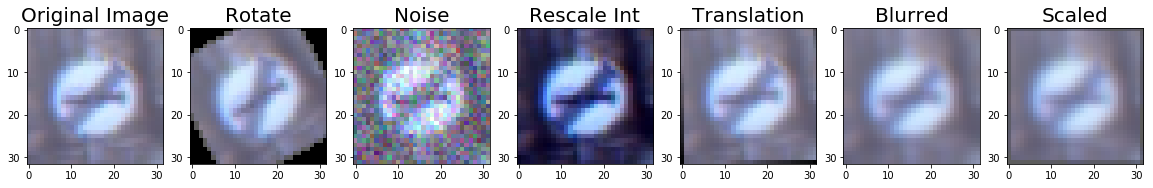

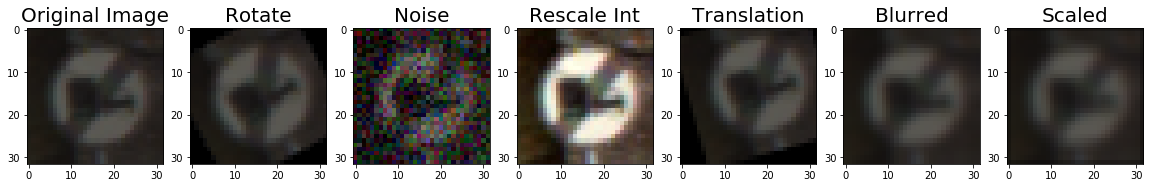

In [16]:
####Testing of the transformations for each label and displaying few of the transformed images
import re
plt.rcParams.update({'figure.max_open_warning': 0})
def testing_transformations():
    nooflabels = 43
    for label in range(nooflabels): 

        X_train_one_label = X_train[np.where(y_train==label)]
        desc = class_desc.loc[class_desc.ClassId==label]
        name = desc.SignName.values.item()
        length = len(X_train_one_label)

        writename = name+'-'+np.str(label)+'.jpg'
        writename=re.sub(r'[(|)|/|" "]',r'',writename)
        #print(name+'-'+np.str(label)+'.jpg')        
        
        index = random.randint(0, length-1)
        image = X_train_one_label[index].squeeze()

        rotate = random_rotation(image)
        noise = random_noise(image)
        rescale = rescale_intensity(image)
        trans = translation(image)
        #ver_flip = vertical_flip(image)
        blur = blur_image(image)
        scal = scale_img(image)
        
        fig, axes = plt.subplots(1, 7, figsize=(20,10))
        ax1,ax2,ax3,ax4,ax5,ax6,ax7 = axes.flatten()
        ax1.imshow(image)
        ax1.set_title('Original Image', fontsize=20)
        ax2.imshow(rotate)
        ax2.set_title('Rotate', fontsize=20)        
        ax3.imshow(noise)
        ax3.set_title('Noise', fontsize=20)
        ax4.imshow(rescale)
        ax4.set_title('Rescale Int', fontsize=20)        
        ax5.imshow(trans)
        ax5.set_title('Translation', fontsize=20)
        ax6.imshow(blur)
        ax6.set_title('Blurred', fontsize=20)
        ax7.imshow(scal)
        ax7.set_title('Scaled', fontsize=20)        

        img_data = io.BytesIO()
        fig.savefig(img_data, format='png')
        img_data.seek(0)
        s3client.put_object(Bucket=mybucket,Body=img_data, ContentType='image/png', Key='output_images/'+writename)
        

#uncomment for testing few samples of each transformed labels
testing_transformations()

In [14]:

#this is for generating new transformed images 
##this function provide random images for each transformation
def get_random_image_of_given_label(images_set, labels_set, label):
    image_indexes = np.where(labels_set == label)
    #print('image_indexes--', len(image_indexes[0]))
    rand_index = random.randint(0, np.bincount(labels_set)[label] - 1)
    #print('rand_index---',rand_index)
    return images_set[image_indexes][rand_index]

###From the list of given transformation functions available, randomly choose a function and create a 
###new image
def transform_image(image):
    key = random.choice(list(available_transformations))
    transformed_image = available_transformations[key](image)
    return transformed_image
    
###Calculate the mean of the training dataset for each lable, since the distribution of the data for each lable is 
###not equal we will create new images as per the mean
def equalize_samples_set(X_set, y_set):
    
    X_temp1= np.empty([1,32,32,3])
    y_temp1 = np.empty([1])
    
    labels_count_arr = np.bincount(y_set)
    labels_bins = np.arange(len(labels_count_arr))
    label_count_mean = int(np.mean(labels_count_arr)) * 4
    
    for label in range(len(labels_bins)):  
        labels_no_to_add =   label_count_mean - labels_count_arr[label]
        print('Label ----', label)
        X_temp = []
        y_temp = []

        for num in range(labels_no_to_add):      
            rand_image = get_random_image_of_given_label(X_set, y_set, label)
            X_temp.append(transform_image(rand_image))
            y_temp.append(label)            

        X_temp1 = np.append(X_temp1, X_temp, axis=0)
        y_temp1 = np.append(y_temp1, y_temp, axis=0)
            
    return X_temp1, y_temp1

X_temp_T, y_temp_T = equalize_samples_set(X_train, y_train)
print('X_temp_T.shape---',X_temp_T.shape)
print('y_temp_T.shape---', y_temp_T.shape)


Label ---- 0
Label ---- 1
Label ---- 2
Label ---- 3
Label ---- 4
Label ---- 5
Label ---- 6
Label ---- 7
Label ---- 8
Label ---- 9
Label ---- 10
Label ---- 11
Label ---- 12
Label ---- 13
Label ---- 14
Label ---- 15
Label ---- 16
Label ---- 17
Label ---- 18
Label ---- 19
Label ---- 20
Label ---- 21
Label ---- 22
Label ---- 23
Label ---- 24
Label ---- 25
Label ---- 26
Label ---- 27
Label ---- 28
Label ---- 29
Label ---- 30
Label ---- 31
Label ---- 32
Label ---- 33
Label ---- 34
Label ---- 35
Label ---- 36
Label ---- 37
Label ---- 38
Label ---- 39
Label ---- 40
Label ---- 41
Label ---- 42
X_temp_T.shape--- (104350, 32, 32, 3)
y_temp_T.shape--- (104350,)


In [15]:
###merge the original image array with the new created image array of transformed images
X_train = np.append(X_train, X_temp_T, axis=0)
y_train = np.append(y_train, y_temp_T, axis=0)

print('X_Train.shape ---', X_train.shape)
print('y_train.shape ---',y_train.shape)

X_temp_T = 0
y_temp_T = 0

X_Train.shape --- (139149, 32, 32, 3)
y_train.shape --- (139149,)


In [16]:

### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
###Converting the image to grayscale
def grayscale(img): 
    img = img.astype('uint8')
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return gray
###Normalizing the given image so that data lies between -1 and 1
def normalize(value):
    nm = np.array(value/255*2-1)
    return nm

#histogram equalization is a method that adjusts image intensities 
#in order to enhance the contrast of the image. This is a type of global contrast enhancement
# It is straightforward to apply this function on a grayscale image 
#as the method actually equalizes the histogram of a grayscale image
def hist_equilize(image):
    hist_equalization_result = cv2.equalizeHist(image)
    return hist_equalization_result

###function that performs the above 3 transformations on the image
def preprocess_image(image):
    #print('image.shape-befor--',image.shape)
    img = grayscale(image)
    img = hist_equilize(img)
    img = normalize(img)
    #print('after normalize--',img)
    #print('max-',np.max(img))
    #print('min-', np.min(img))
    img = np.reshape(img, [img.shape[0],img.shape[1], 1])
    return img

###Function to get the above 3 transformations done for the whole dataset
def preprocess_batch(images):
    imgs = np.zeros(shape=[images.shape[0],images.shape[1],images.shape[2],1])
    #print(imgs.shape)
    for i in range(images.shape[0]):
        imgs[i] = preprocess_image(images[i])  
    return imgs


In [17]:
##Process the train, valid and test dataset as per the above functions
##only the training dataset has  increased in size due to the additions of new transformed images
##for bringing in an equal distribution of images of each label.
X_train_processed = preprocess_batch(X_train)
print('X_train_processed[0].shape----',X_train_processed.shape)
X_valid_processed = preprocess_batch(X_valid)
print('X_valid_processed[0].shape----',X_valid_processed.shape)
X_test_processed = preprocess_batch(X_test)
print('X_test_processed[0].shape----',X_test_processed.shape)



X_train_processed[0].shape---- (139149, 32, 32, 1)
X_valid_processed[0].shape---- (4410, 32, 32, 1)
X_test_processed[0].shape---- (12630, 32, 32, 1)


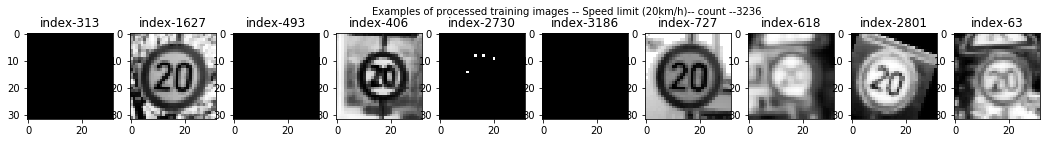

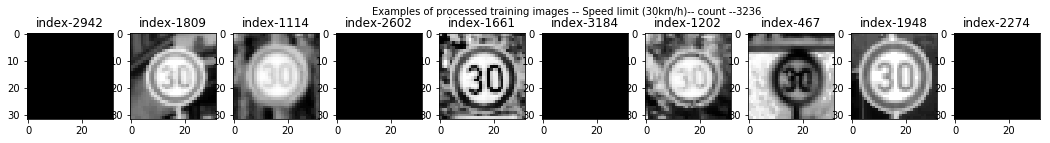

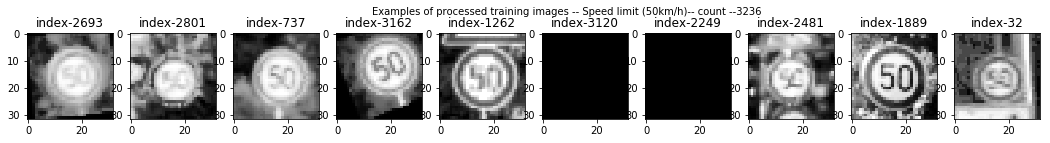

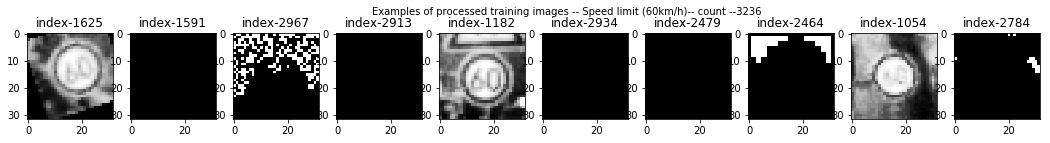

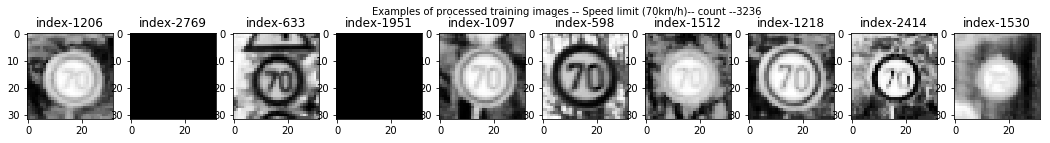

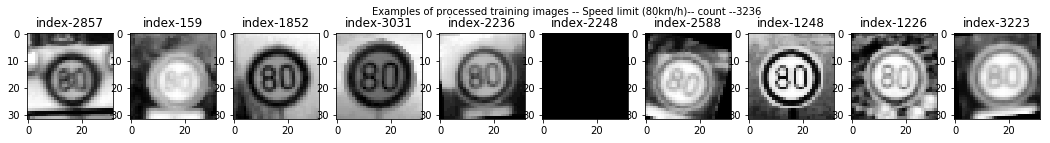

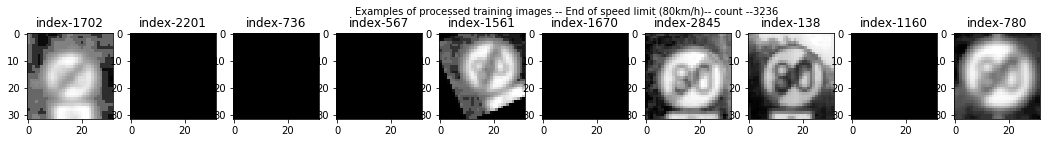

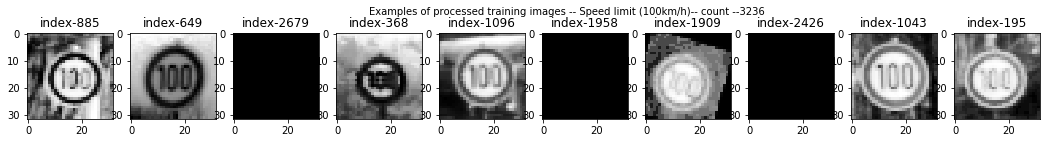

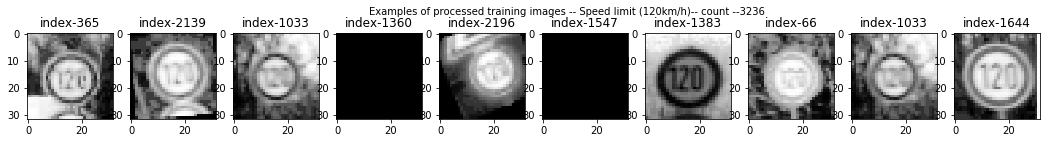

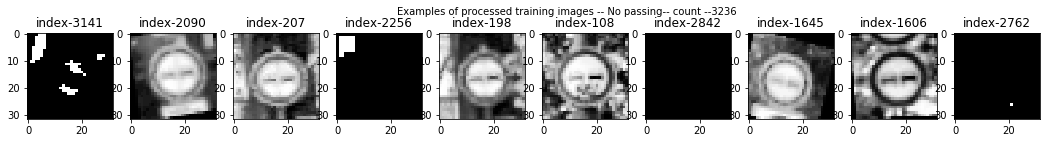

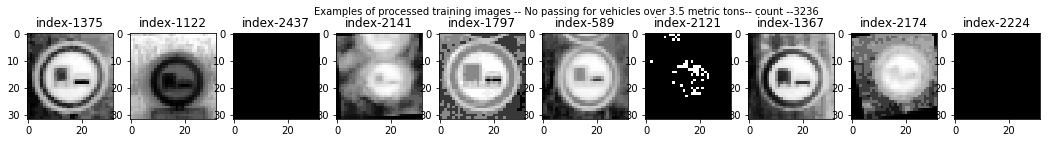

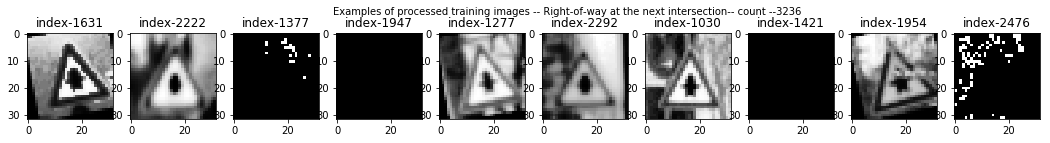

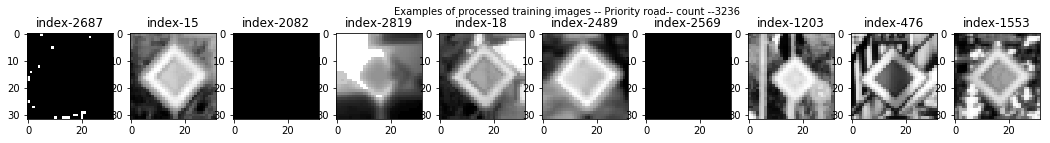

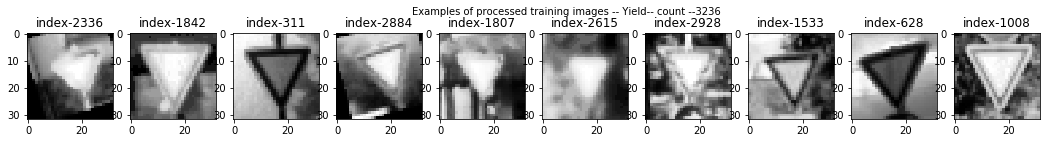

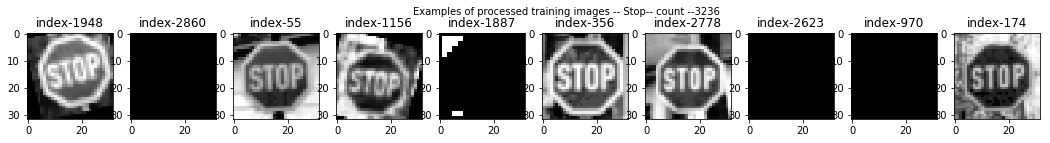

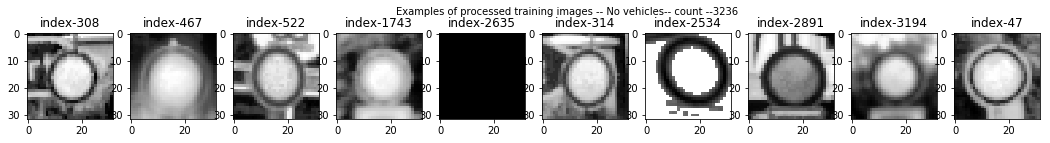

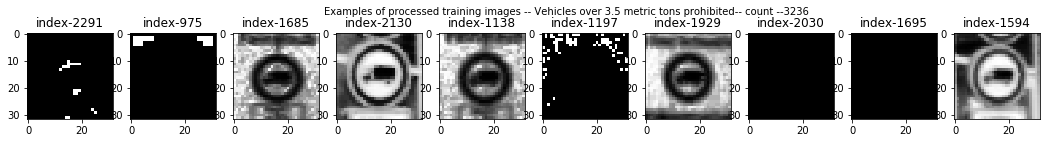

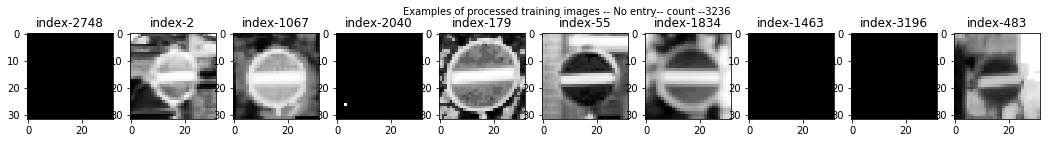

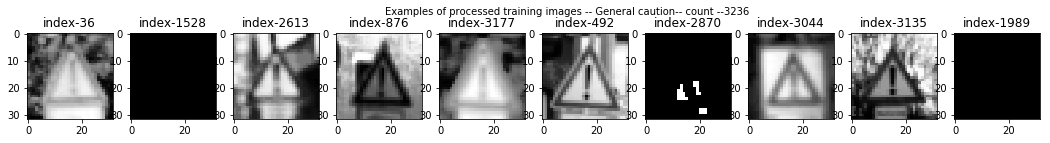

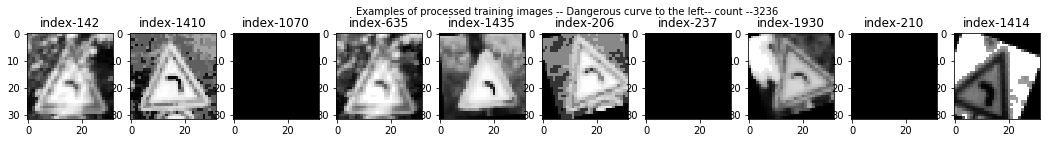

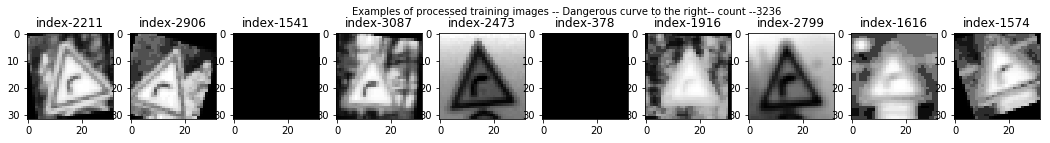

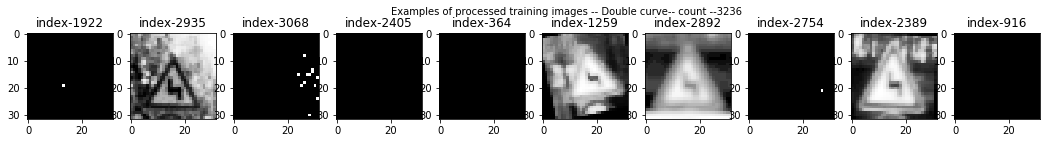

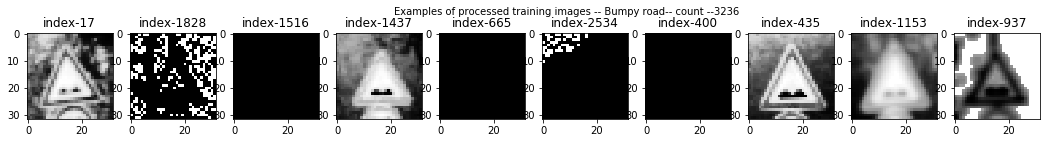

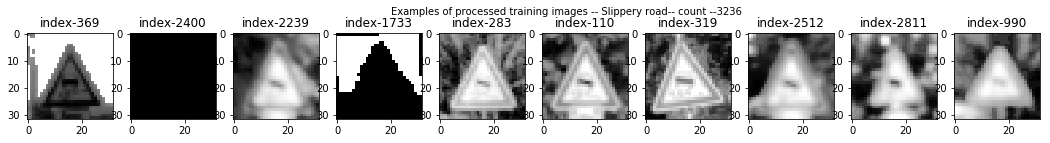

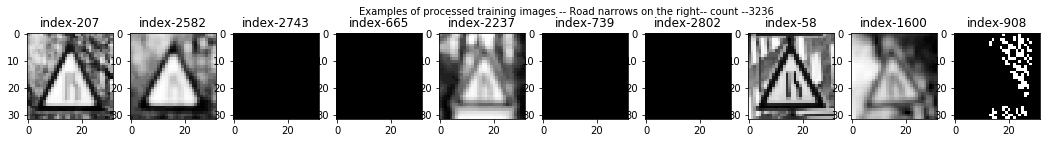

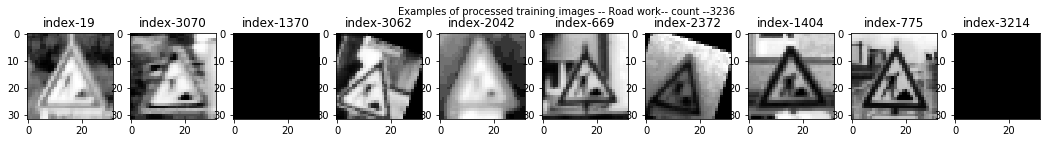

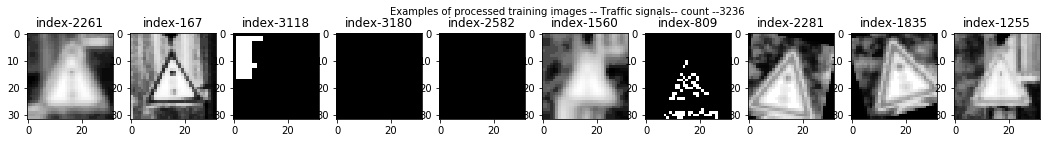

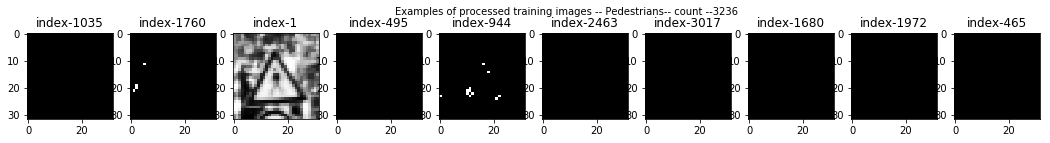

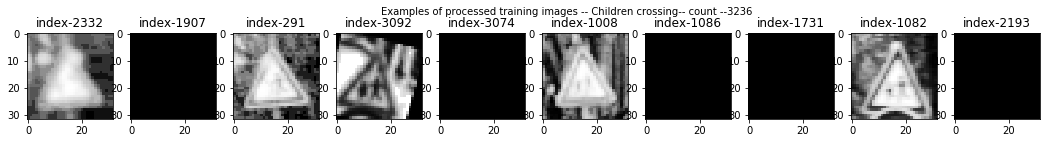

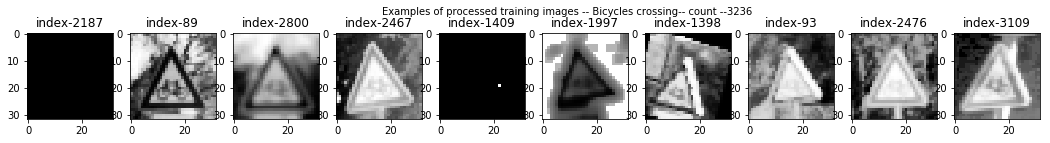

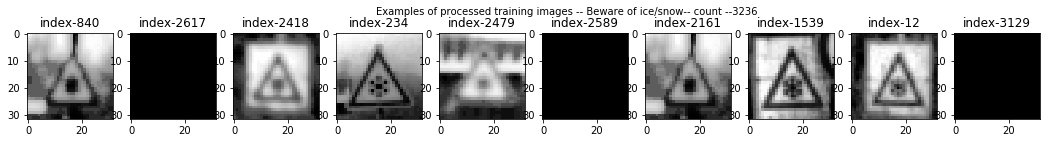

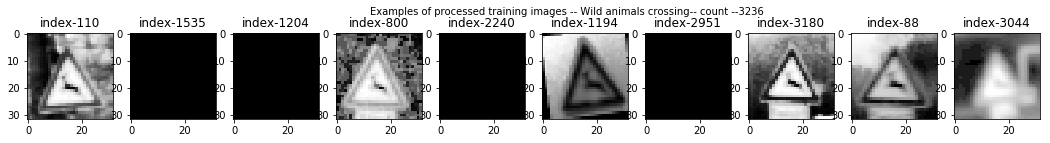

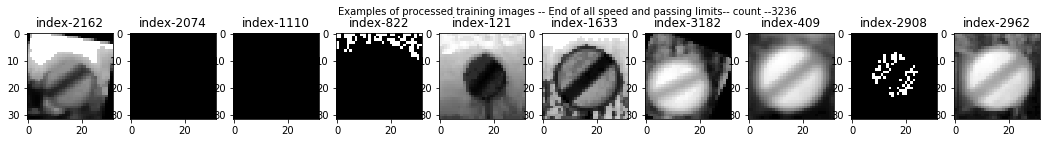

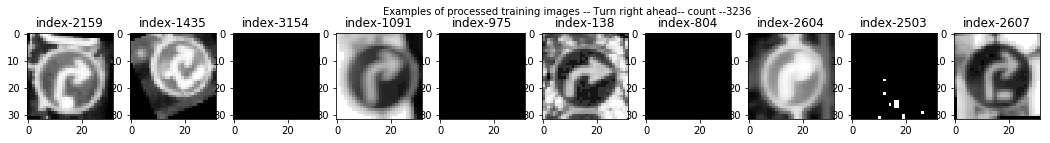

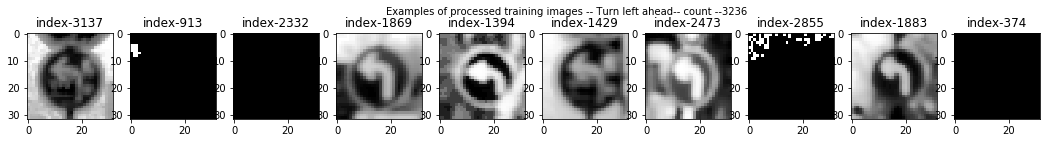

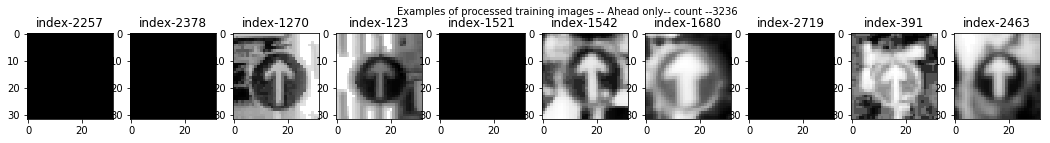

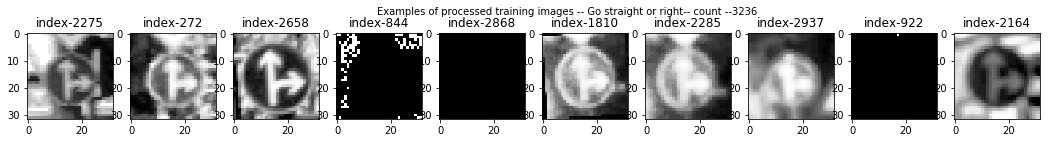

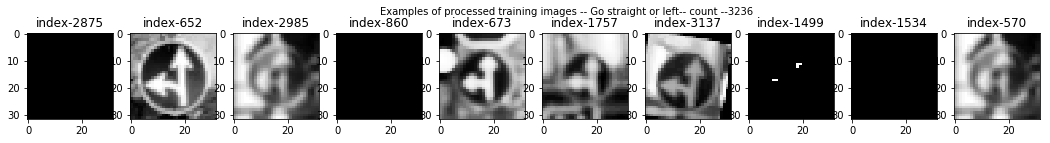

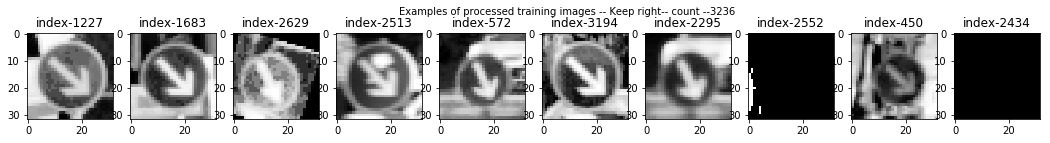

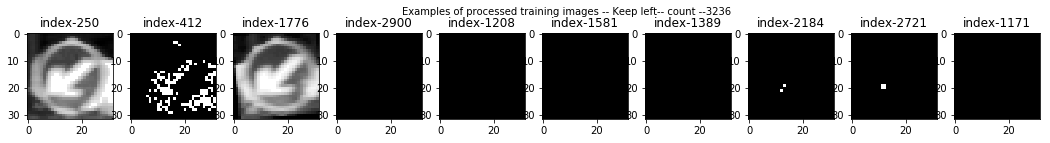

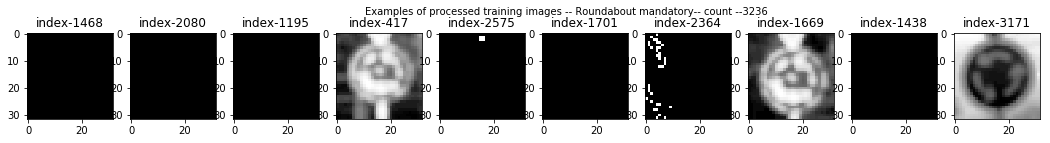

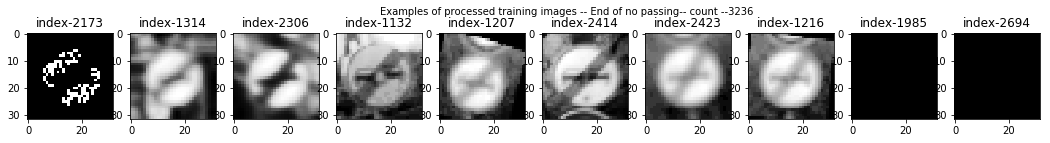

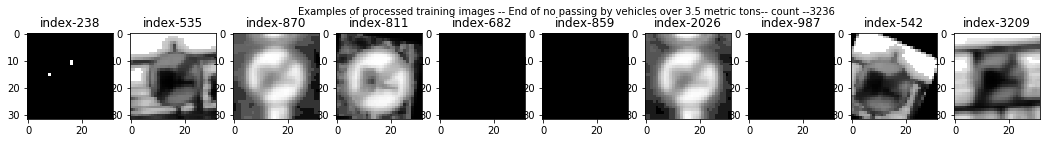

In [18]:
###Visualize some samples of the processed images of the training set.
def visualize_each_label():
    nooflabels = 43  #[8, 14, 19, 28]
    plt.rcParams.update({'figure.max_open_warning': 0})
    for label in range(nooflabels):
        X_train_one_label = X_train_processed[np.where(y_train==label)]
        desc = class_desc.loc[class_desc.ClassId==label]
        name = desc.SignName.values.item()
        length = len(X_train_one_label)

        writename = name+'-'+np.str(label)+'.png'
        writename=re.sub(r'[(|)|/|" "]',r'',writename)

        ### Visualisation of training set
        fig = plt.figure(figsize=(20,2))
        fig.tight_layout()
        fig.suptitle('Examples of processed training images -- '+name +
                     '-- count --' + np.str(length) , fontsize=10)

        for i in range(1,11):
            index = random.randint(0, length-1)
            #print(index)
            image = X_train_one_label[index].squeeze()

            plt.subplot(1,11,i)
            plt.imshow(image, cmap='gray')
            plt.title('index-'+np.str(index))
            
        img_data = io.BytesIO()
        fig.savefig(img_data)
        img_data.seek(0)
        s3client.put_object(Bucket=mybucket,Body=img_data, ContentType='image/png', Key='output_images/processed_'+writename)
    
#uncomment if you want to visualize few of the training images for each label
visualize_each_label()

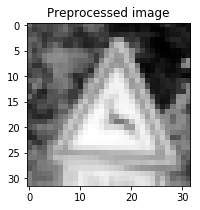

In [19]:
##GET the individual processed image, once which are not clear in the above
no_test_image = 493

sample_image_processed = X_train_processed[no_test_image]
fig=plt.figure(figsize=(16,3))
sub=plt.subplot(132)
sub.set_title("Preprocessed image")
plt.imshow(sample_image_processed.squeeze(), cmap='gray')


### Model Architecture

In [26]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten
tf.reset_default_graph()
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    print(x.shape)
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 30x30x32.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 1, 32), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(32))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    # SOLUTION: Pooling. Input = 30x30x32. Output = 15x15x32.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 13x13x64.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 32, 64), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(64))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    # SOLUTION: Pooling. Input = 13x13x64. Output = 6x6x64.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # SOLUTION: Layer 3: Convolutional. Output = 4x4x128.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 64, 128), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(128))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    # SOLUTION: Activation.
    conv3 = tf.nn.relu(conv3)
    # SOLUTION: Pooling. Input = 4x4x128. Output = 2x2x128.
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 2x2x128. Output = 512.
    fc0   = flatten(conv3)
    
    # SOLUTION: Layer 4: Fully Connected. Input = 512. Output = 256.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(512, 256), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(256))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    # Drop out
    fc1 = tf.nn.dropout(fc1, keep_prob=0.5)
    
    # SOLUTION: Layer 5: Fully Connected. Input = 256. Output = 128.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(256, 128), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(128))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    # Drop out
    fc2 = tf.nn.dropout(fc2, keep_prob=0.5)
    
    # SOLUTION: Layer 6: Fully Connected. Input = 128. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(128, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    return logits


In [27]:
###tensorflow variables for creating the graph
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [22]:
'''
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

varss= tf.trainable_variables()
print(varss)
lossL2 = tf.add_n([ tf.nn.l2_loss(v) for v in varss
                      if '_b' not in v.name ]) * 0.001

print(lossL2)
'''

"\n### Train your model here.\n### Calculate and report the accuracy on the training and validation set.\n### Once a final model architecture is selected, \n### the accuracy on the test set should be calculated and reported as well.\n### Feel free to use as many code cells as needed.\n\nvarss= tf.trainable_variables()\nprint(varss)\nlossL2 = tf.add_n([ tf.nn.l2_loss(v) for v in varss\n                      if '_b' not in v.name ]) * 0.001\n\nprint(lossL2)\n"

In [28]:
###Willbe using decay learning rate 
#Learning rate
starting_learning_rate = 0.003
#Decay steps 
decay_steps = 10000 
#Decay rate - should be less than 1
decay_rate = 0.96

#Capture current step
current_step = tf.Variable(0, trainable=False)

#Exponential decay rate
#Formula for decay = 
#starting_learning_rate * decay_rate^(current_step/decay_steps)
learn_rate = tf.train.exponential_decay(starting_learning_rate, 
                                        current_step,
                                        decay_steps, 
                                        decay_rate)    


In [29]:
#rate = 0.003

logits = LeNet(x)
###calculate the Cross entropy loss for the model
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)

##Will be using AdamOptimizer instead of Gradient Descent as Adamoptimizer is little better than GD
optimizer = tf.train.AdamOptimizer(learning_rate = learn_rate)

training_operation = optimizer.minimize(loss_operation, global_step=current_step)

(?, 32, 32, 1)


In [30]:
EPOCHS = 100
BATCH_SIZE = 128

In [31]:

###Building the graph for prediction and accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [32]:
###running the model
from sklearn.utils import shuffle
cost_arr=[]
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_processed)
    
    print("Training...", num_examples)
    print()
    for i in range(EPOCHS):
        xtrain, ytrain = shuffle(X_train_processed, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = xtrain[offset:end], ytrain[offset:end]
            _,cost=sess.run([training_operation,loss_operation], feed_dict={x: batch_x, y: batch_y})
            
            
        validation_accuracy = evaluate(X_valid_processed, y_valid)
        print("EPOCH; {}; Valid.Acc.; {:.3f}; Loss; {:.5f}".format(i+1, validation_accuracy, cost))
        cost_arr.append(cost)
        
        
    saver.save(sess, './lenet')
    print("Model saved")

Training... 139149

EPOCH; 1; Valid.Acc.; 0.873; Loss; 1.45418
EPOCH; 2; Valid.Acc.; 0.923; Loss; 1.29321
EPOCH; 3; Valid.Acc.; 0.943; Loss; 1.40445
EPOCH; 4; Valid.Acc.; 0.946; Loss; 1.29228
EPOCH; 5; Valid.Acc.; 0.939; Loss; 1.81275
EPOCH; 6; Valid.Acc.; 0.939; Loss; 0.71563
EPOCH; 7; Valid.Acc.; 0.960; Loss; 0.86464
EPOCH; 8; Valid.Acc.; 0.949; Loss; 1.14442
EPOCH; 9; Valid.Acc.; 0.961; Loss; 0.72449
EPOCH; 10; Valid.Acc.; 0.961; Loss; 1.24862
EPOCH; 11; Valid.Acc.; 0.964; Loss; 2.05124
EPOCH; 12; Valid.Acc.; 0.964; Loss; 1.66872
EPOCH; 13; Valid.Acc.; 0.951; Loss; 1.22081
EPOCH; 14; Valid.Acc.; 0.966; Loss; 1.43950
EPOCH; 15; Valid.Acc.; 0.958; Loss; 0.99235
EPOCH; 16; Valid.Acc.; 0.958; Loss; 1.64498
EPOCH; 17; Valid.Acc.; 0.959; Loss; 0.81721
EPOCH; 18; Valid.Acc.; 0.965; Loss; 1.65837
EPOCH; 19; Valid.Acc.; 0.965; Loss; 1.87454
EPOCH; 20; Valid.Acc.; 0.953; Loss; 1.10850
EPOCH; 21; Valid.Acc.; 0.952; Loss; 1.30619
EPOCH; 22; Valid.Acc.; 0.966; Loss; 0.66978
EPOCH; 23; Valid.Acc.

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.938


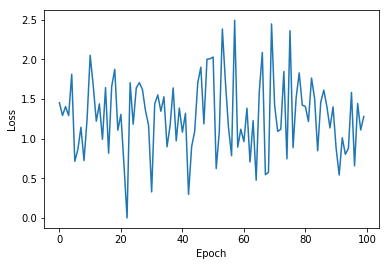

In [33]:
##prediction from the test dataset 
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_processed, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    
plt.plot(cost_arr)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [ ]:
##prediction from the test dataset 
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_train_processed, y_train)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

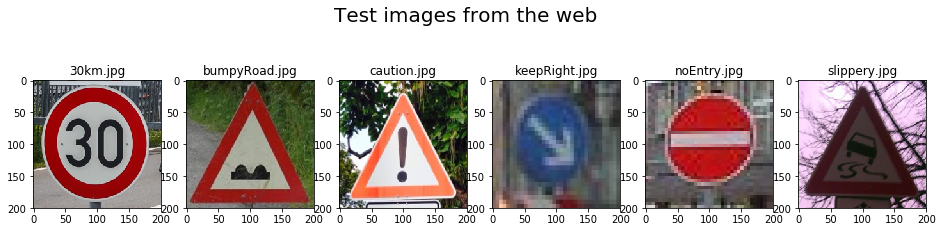

In [36]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg
import os

s3 = boto3.resource('s3')
bucket = s3.Bucket('trafficsigndetectionbiju')
folder1="test_images/"
test_images =[]
## responses of the new test images from the internet
test_responses = np.array([1,22,18,38,17,23])

fig = plt.figure(figsize=(16,4))
fig.suptitle('Test images from the web', fontsize=20)

cnt=0
###Listing out the images from the S3 bucket
for obj in bucket.objects.filter(Prefix=folder1):
    #print(obj.key)
    if (obj.key.endswith('.jpg')):
        file_stream = io.BytesIO()
        cnt = cnt+1
        image_object=bucket.Object(obj.key)
        file_stream.seek(0)
        image = mpimg.imread(io.BytesIO(image_object.get()['Body'].read()), 'jpg')
        img_name = os.path.basename(obj.key)
        
        img_to_show = cv2.resize(image, (200,200), interpolation = cv2.INTER_AREA)
        image = cv2.resize(image, (32,32), interpolation = cv2.INTER_AREA)
        
        sub = plt.subplot(1,6,cnt)
        sub.set_title(img_name)
        plt.imshow(img_to_show)
        
        image = preprocess_image(image)
        test_images.append(image)
        
test_images = np.array(test_images)

### Predict the Sign Type for Each Image

In [37]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
pred_val = tf.argmax(logits, 1)
pred_softmax = tf.nn.softmax(logits)
pred_topfive = tf.nn.top_k(pred_softmax, k=5)

###Predict the new 6 test images
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    pred_val_out, pred_topfive_out = sess.run( [pred_val, pred_topfive] , feed_dict= {x: test_images, y:test_responses})
    
print('Predicted Labels')
print(pred_val_out)
print()

###print out all the predictions on the 6 test images 
cnt =0
correct_cnt = 0
for val in pred_val_out:
    desc = class_desc.loc[class_desc.ClassId==val]
    name = desc.SignName.values.item()
    correctness = 'Correct'
    if test_responses[cnt] ==val:
        correctness = "Correct"
        correct_cnt = correct_cnt +1
    else:
        correctness = "Not Correct"

    print("{} - {} --> {}".format(val,name,correctness))
    cnt +=1

INFO:tensorflow:Restoring parameters from ./lenet
Predicted Labels
[ 1 22 18 38 17 23]

1 - Speed limit (30km/h) --> Correct
22 - Bumpy road --> Correct
18 - General caution --> Correct
38 - Keep right --> Correct
17 - No entry --> Correct
23 - Slippery road --> Correct


### Analyze Performance

In [38]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
print("Accuracy for the tested images equals: {:2f}%" .format(correct_cnt/cnt*100))

Accuracy for the tested images equals: 100.000000%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

Top 5 softmax probabilities for each test image
TopKV2(values=array([[9.9514991e-01, 4.7418410e-03, 1.0255267e-04, 3.0383555e-06,
        1.6835462e-06],
       [1.0000000e+00, 2.5710465e-30, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [1.0000000e+00, 1.1668735e-10, 7.2813198e-25, 1.2053483e-28,
        1.5127654e-32],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [1.0000000e+00, 1.9150954e-14, 1.2639526e-18, 7.4157822e-19,
        4.9435389e-19]], dtype=float32), indices=array([[ 1,  2,  4,  5,  7],
       [22, 26,  0,  1,  2],
       [18, 26, 27, 37, 25],
       [38,  0,  1,  2,  3],
       [17,  0,  1,  2,  3],
       [23, 19, 28, 31, 20]], dtype=int32))


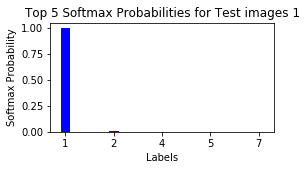

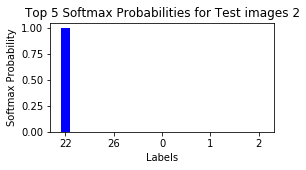

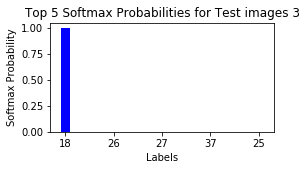

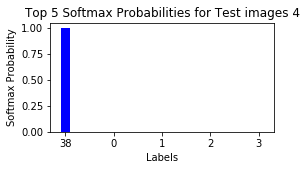

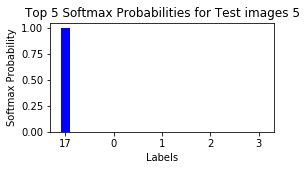

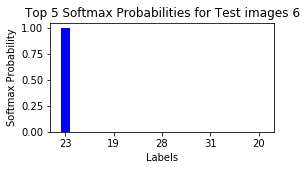

In [39]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
print("Top 5 softmax probabilities for each test image")
print(pred_topfive_out)

top_k_values = pred_topfive_out[0]
top_k_indices = pred_topfive_out[1]

ind = np.arange(5)

for i in range(6):
    fig=plt.figure(figsize=(4,2))
    values = top_k_values[i]
    plt.bar(ind, values, 0.2, color='b')
    plt.ylabel('Softmax Probability')
    plt.xlabel('Labels')
    plt.title('Top 5 Softmax Probabilities for Test images {}' . format(str(i+1)))
    plt.xticks(ind,tuple(top_k_indices[i]))
    ##Saving each softmax probability to S3
    img_data = io.BytesIO()
    fig.savefig(img_data, format='png')
    img_data.seek(0)
    s3client.put_object(Bucket=mybucket,Body=img_data, ContentType='image/png', Key='output_images/training_set.png')

plt.show()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [40]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the 
#calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets
#min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the 
#plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, 
                           vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")